In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
x, y = make_classification(n_samples=1000, n_features=15, n_informative=10, n_redundant=2, n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=42)

In [ ]:
df = pd.DataFrame(x, columns=[f'Fitur_{i}' for i in range(1,16)])
df['Target'] = y

df['Fitur_12'] = np.random.choice(['A', 'B', 'C'], size=1000)
df['Fitur_13'] = np.random.choice(['X', 'Y', 'Z'], size=1000)

df

,Fitur_1,Fitur_2,Fitur_3,Fitur_4,Fitur_5,Fitur_6,Fitur_7,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_12,Fitur_13,Fitur_14,Fitur_15,Target
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,C,X,1.005559,-0.276558,0
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,C,Z,-0.243630,0.285979,0
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,B,Z,2.486020,-2.867291,0
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,A,X,-0.788215,1.255376,0
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,C,X,0.712335,2.810524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.927482,-0.017325,4.884411,0.542628,3.033376,-1.904407,0.953035,1.278882,-1.293396,1.772169,-1.191263,B,Z,-0.387151,-2.629004,0
996,0.347761,-1.690916,5.949207,-2.289729,2.238469,-0.067922,-0.069702,-1.436622,-2.153011,-0.867583,3.962758,B,X,0.886822,-1.248408,0
997,1.201967,-1.263417,-1.331925,-2.468434,1.777577,2.270456,-0.431749,-1.846263,1.753033,1.858452,4.264568,B,Z,0.067260,0.931995,1
998,-2.127846,-0.975838,0.279144,0.151578,-0.443749,0.650616,-1.410265,-1.017319,-0.643070,2.142898,3.399255,C,X,-0.128774,0.800834,0


In [ ]:
x = df.drop(columns='Target', axis=1)
y = df['Target']

In [ ]:
print(f'Distribusi Data sebelum SMOTE: {Counter(y)}')

Distribusi Data sebelum SMOTE: Counter({0: 901, 1: 99})


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
x_integer = x.drop(columns=['Fitur_12', 'Fitur_13'], axis=1)
rf_model.fit(x_integer, y)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

threshold = 0.05
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

print('Fitur yang dipilih oleh Embedded Methods (di atas ambang batas)')
for i in important_features_indices:
  print(f'{x.columns[i]}: {importances[i]}')

important_features= x_integer.columns[important_features_indices]
x_important = x_integer[important_features]

print('\nDimensi data pelatihan dengan fitur penting: ', x_important.shape)

Fitur yang dipilih oleh Embedded Methods (di atas ambang batas)
Fitur_2: 0.11860019897866206
Fitur_3: 0.06878603593465271
Fitur_5: 0.07731131335837178
Fitur_8: 0.050482655781999855
Fitur_9: 0.2625049418105367
Fitur_10: 0.08958259568334655
Fitur_11: 0.06365230544114515
Fitur_13: 0.12578161860669113

Dimensi data pelatihan dengan fitur penting:  (1000, 8)


In [ ]:
x_selected = pd.concat([x_important, x['Fitur_12']], axis=1)
x_selected = pd.concat([x_selected, x['Fitur_13']], axis=1)
x_selected

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15,Fitur_12,Fitur_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,C,X
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,C,Z
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,B,Z
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,A,X
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,C,X
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,B,Z
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,B,X
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,B,Z
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,C,X


In [ ]:
label_encoder = LabelEncoder()

x_selected['Fitur_12'] = label_encoder.fit_transform(x_selected['Fitur_12'])
# print(label_encoder.inverse_transform(x_selected[['Fitur_12']]))

x_selected['Fitur_13'] = label_encoder.fit_transform(x_selected['Fitur_13'])
# print(label_encoder.inverse_transform(x_selected[['Fitur_13']]))

print(x_selected)

      Fitur_2   Fitur_3   Fitur_5   Fitur_8   Fitur_9  Fitur_10  Fitur_11  \
0   -3.472520 -1.314199  0.642138  1.146301 -2.173112  2.765828 -1.821258   
1   -1.770842 -1.578851 -2.025230 -3.958705 -0.598147  1.018789  4.194233   
2   -2.051770  3.631998  1.674093  0.031633 -1.140149  2.069694  1.935251   
3   -1.608657 -0.735184 -1.753532 -2.897416 -0.830328  1.572469  5.334621   
4   -2.362885 -3.909120 -4.029843 -3.435229 -2.142380  2.332385  3.816539   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.017325  4.884411  3.033376  1.278882 -1.293396  1.772169 -1.191263   
996 -1.690916  5.949207  2.238469 -1.436622 -2.153011 -0.867583  3.962758   
997 -1.263417 -1.331925  1.777577 -1.846263  1.753033  1.858452  4.264568   
998 -0.975838  0.279144 -0.443749 -1.017319 -0.643070  2.142898  3.399255   
999  1.387667 -5.554578 -2.834755 -1.932864  2.625895  0.246120  0.786726   

     Fitur_15  Fitur_12  Fitur_13  
0   -0.276558         2         0  
1  

In [ ]:
numeric_columns = x_selected.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['Fitur_12', 'Fitur_13'])

x_cleaned = x_important.copy()

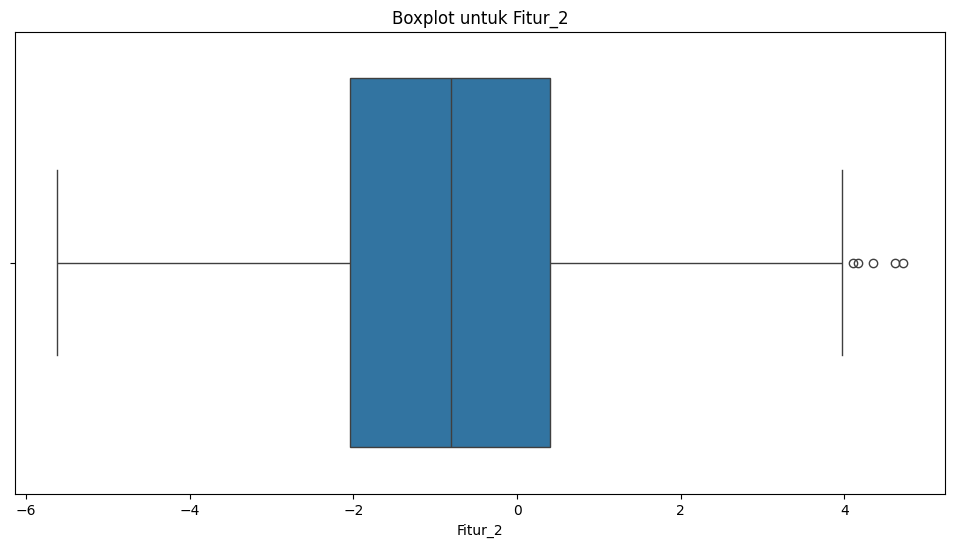

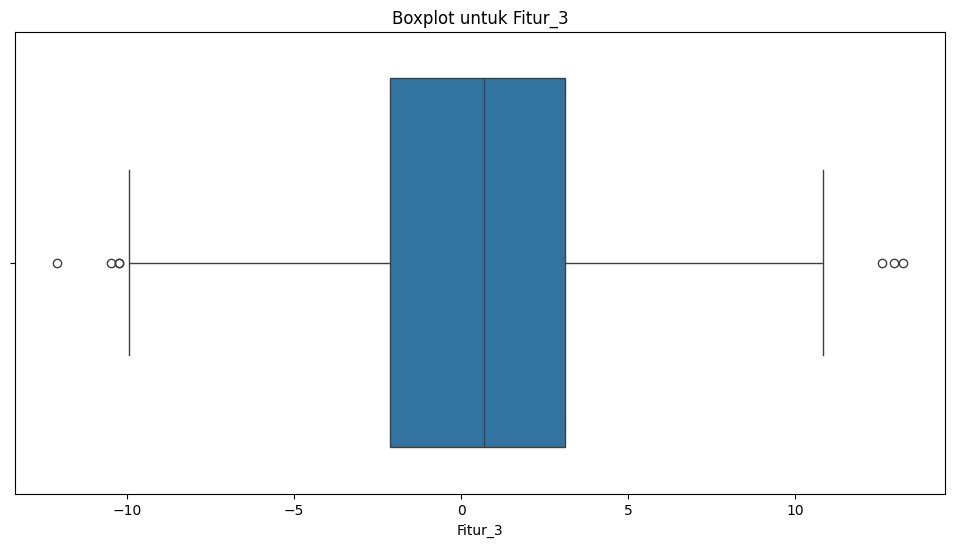

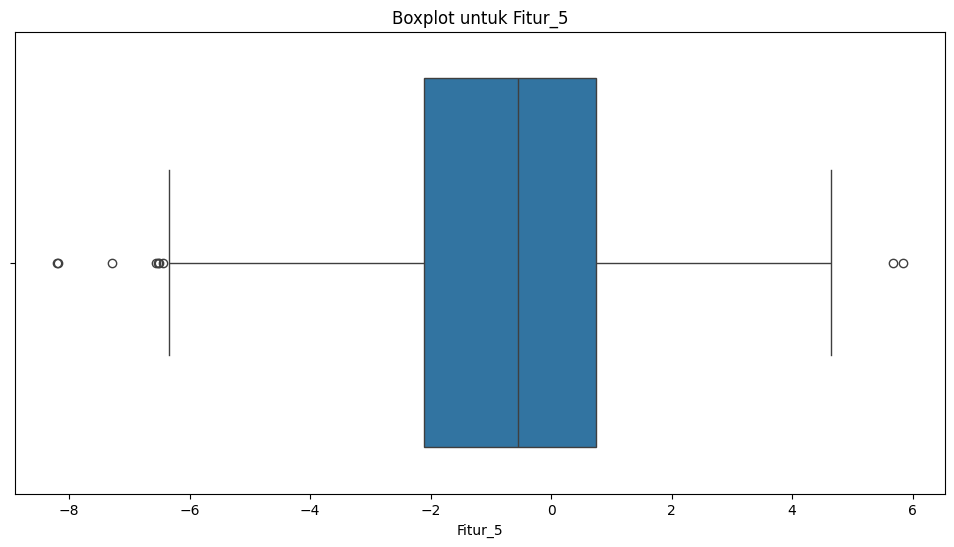

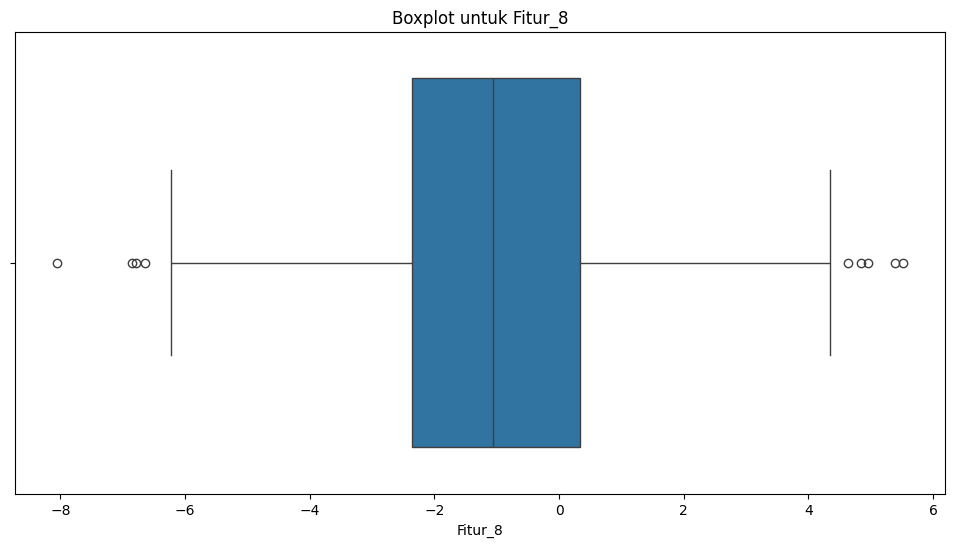

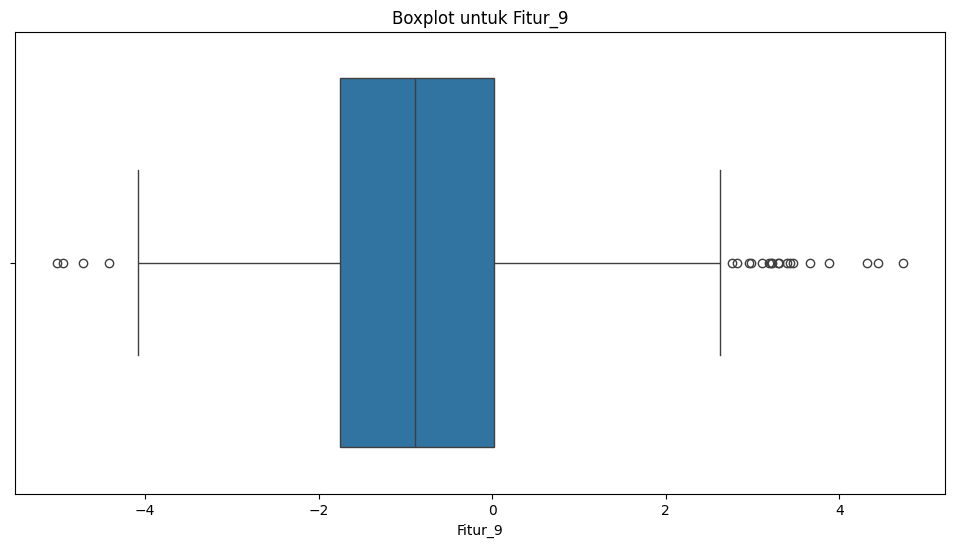

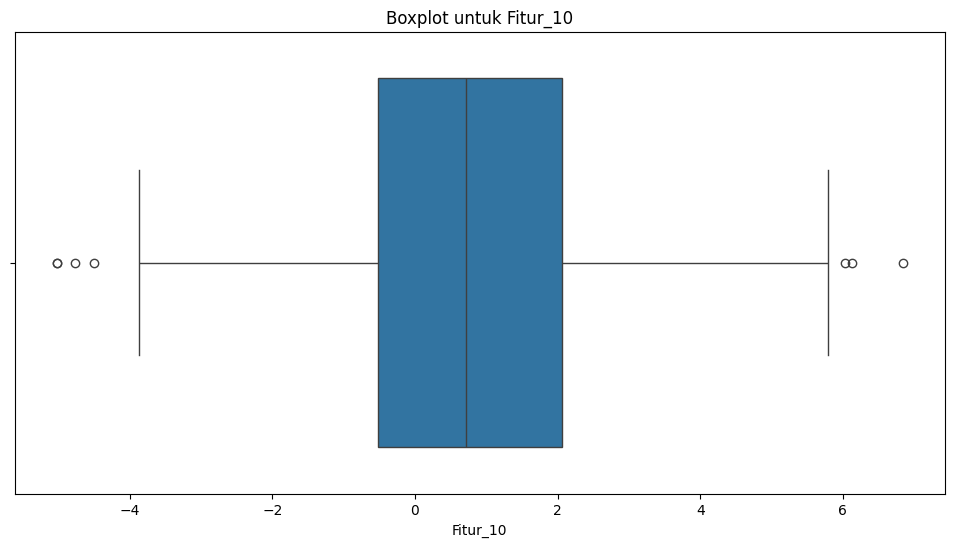

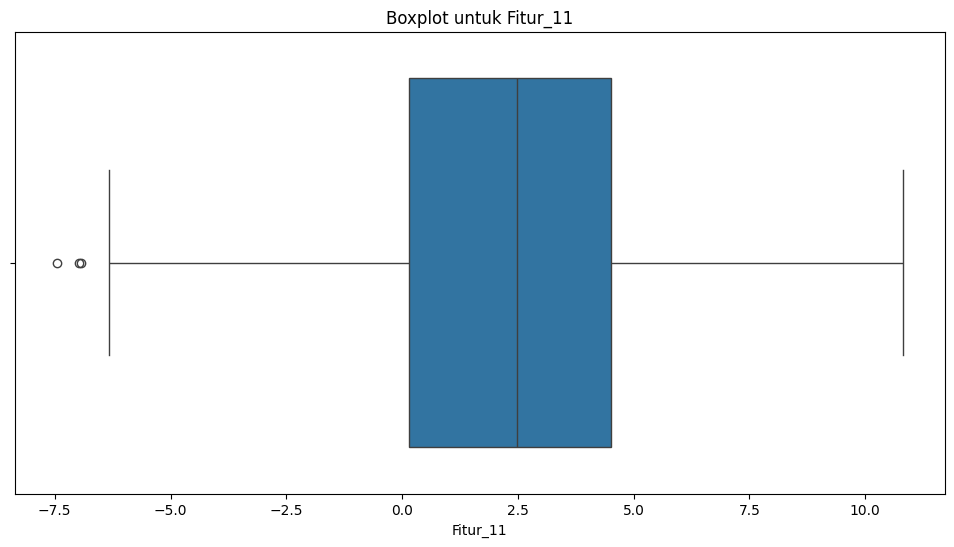

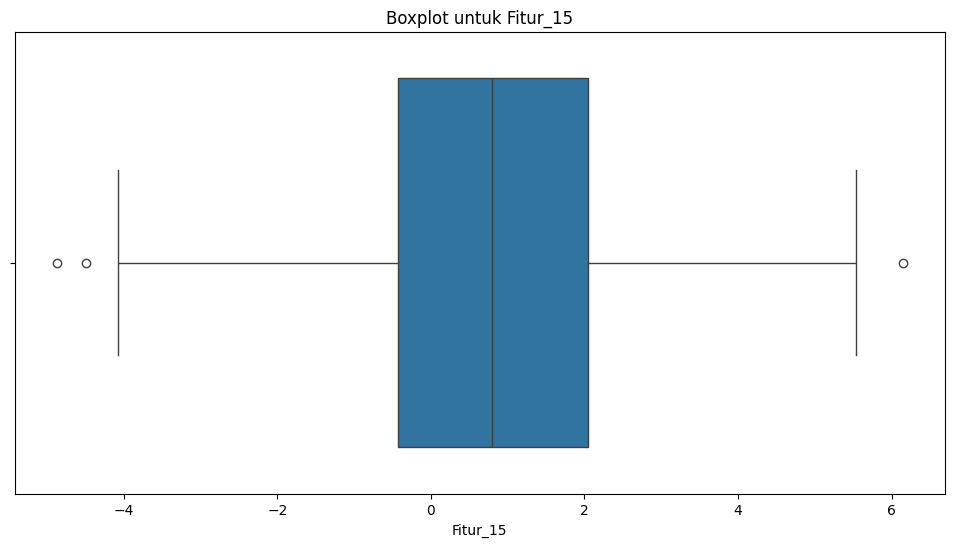

In [ ]:
for i,column in enumerate(numeric_columns, 1):
  plt.figure(figsize=(12,6))
  sns.boxplot(x=x_cleaned[column])
  plt.title(f'Boxplot untuk {column}')
  plt.xlabel(column)

plt.show()

In [ ]:
for col in numeric_columns:
  q1 = x_important[col].quantile(0.25)
  q3 = x_important[col].quantile(0.75)

  IQR = q3 - q1
  lower_bound = q1 - IQR * 1.5
  upper_bound = q3 + IQR * 1.5

  outliers = x_cleaned[(x_cleaned[col] < lower_bound) | (x_cleaned[col] > upper_bound)]

  x_cleaned = x_cleaned.drop(outliers.index)

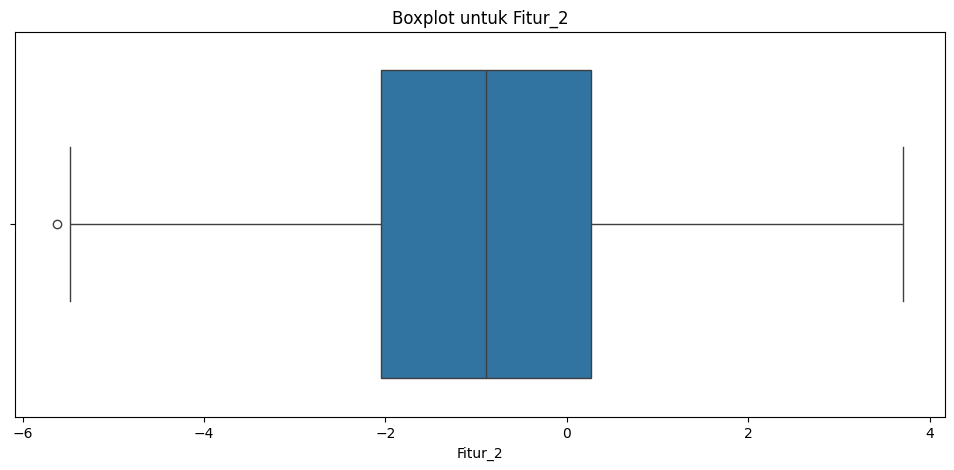

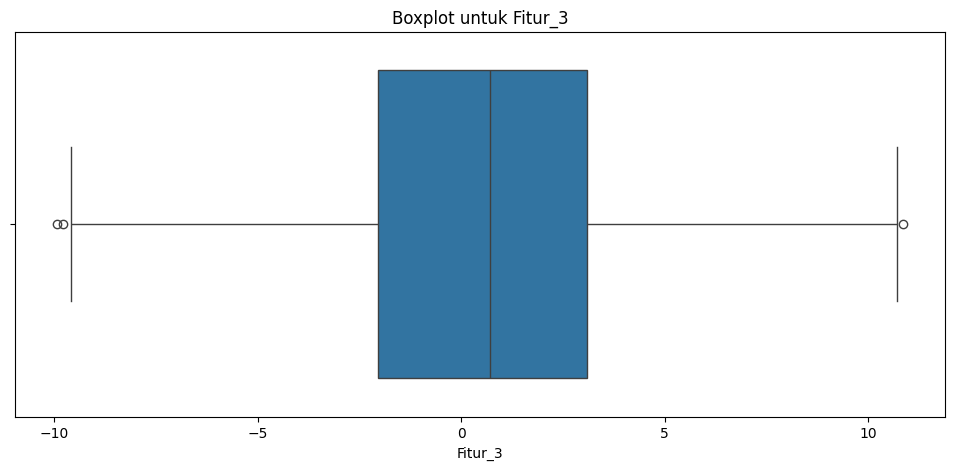

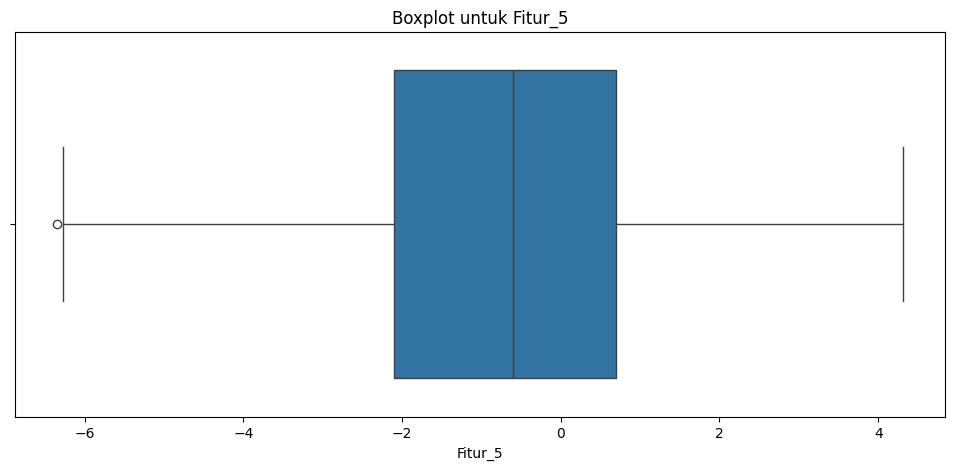

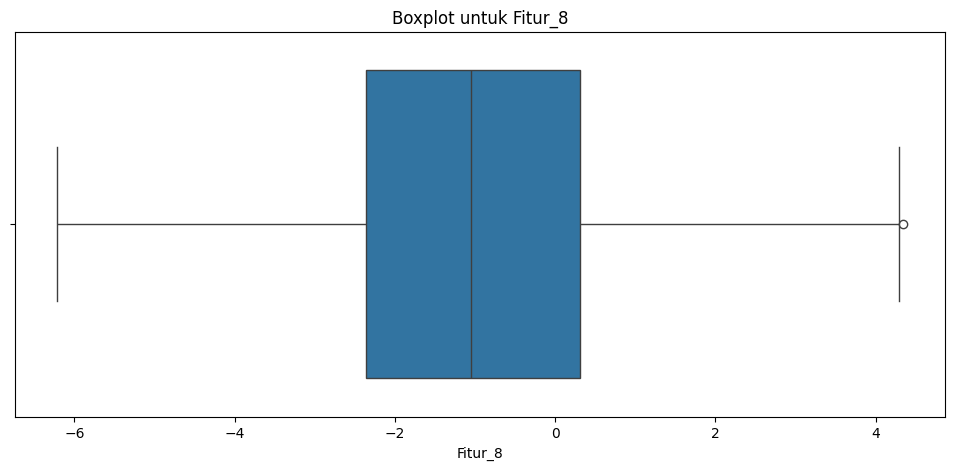

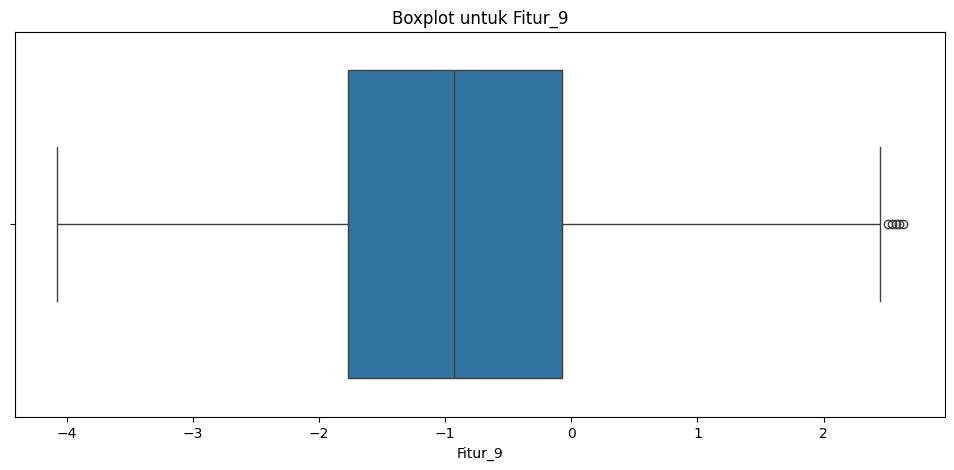

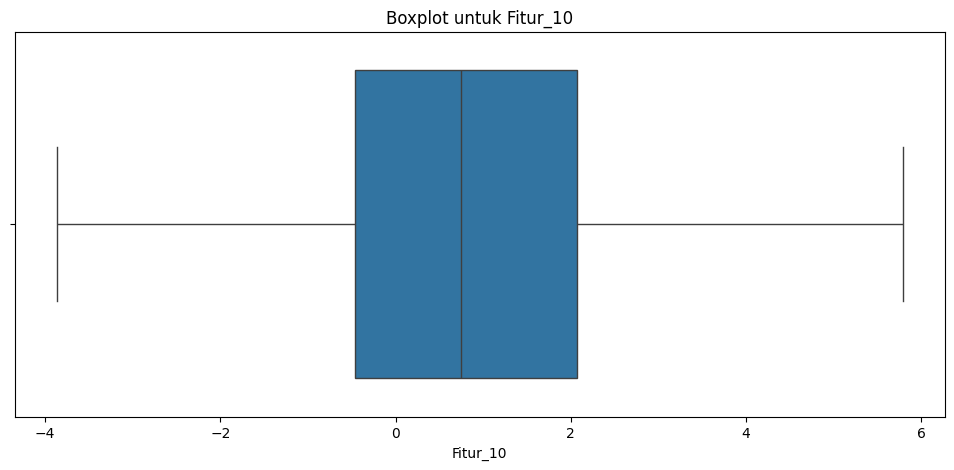

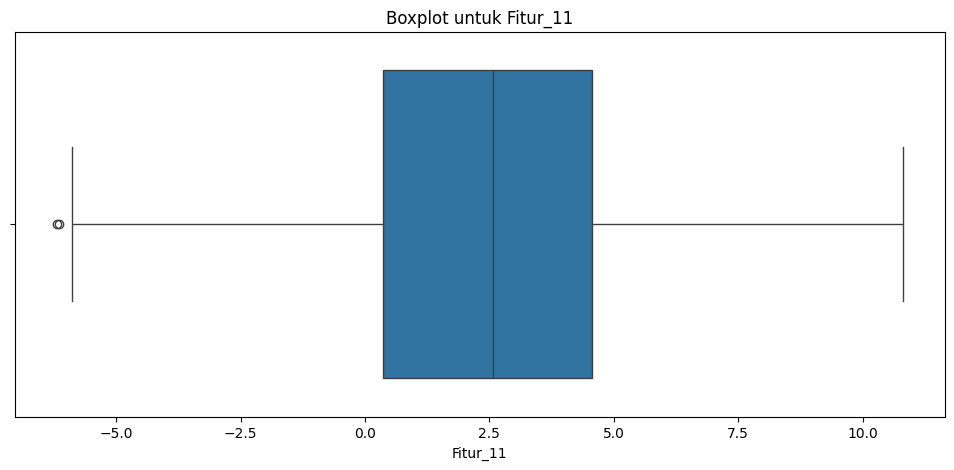

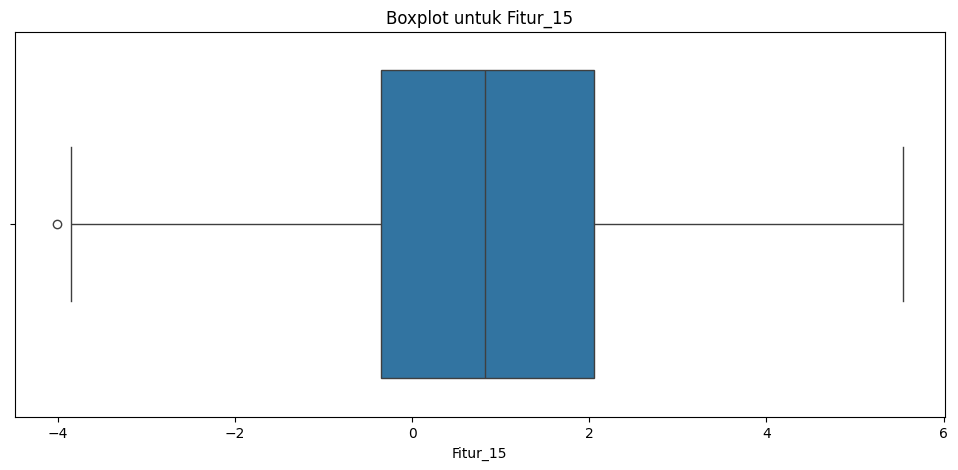

In [ ]:
for i, column in enumerate(numeric_columns, 1):
  plt.figure(figsize=(12,5))
  sns.boxplot(x=x_cleaned[column])
  plt.title(f'Boxplot untuk {column}')
  plt.show()

In [ ]:
x_cleaned

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524
...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834


In [ ]:
smote = SMOTE(random_state=42)

y_cleaned = y[x_cleaned.index]
x_resampled, y_resampled = smote.fit_resample(x_cleaned, y_cleaned)

print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))

x_resampled = pd.DataFrame(x_resampled)
y_resampled = pd.Series(y_resampled, name='Target')

Distribusi kelas setelah SMOTE: Counter({0: 875, 1: 875})


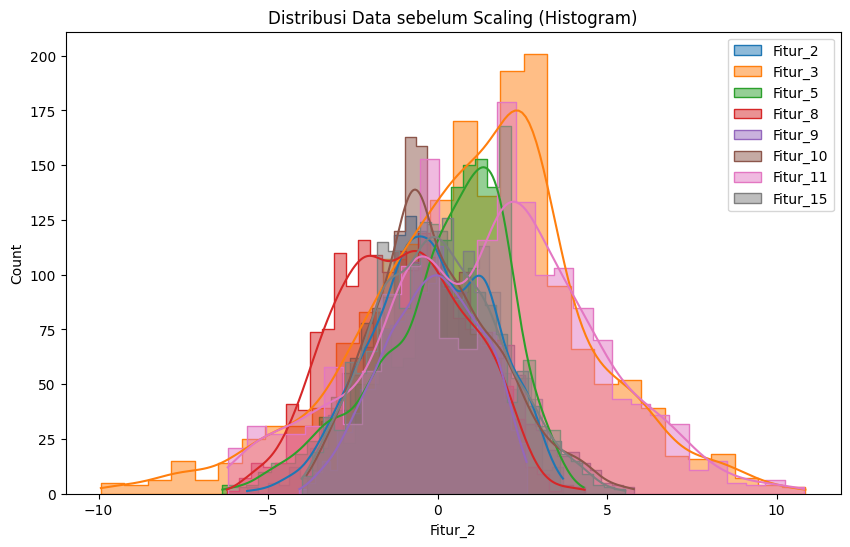

In [ ]:
plt.figure(figsize=(10,6))
for col in x_resampled.columns:
  sns.histplot(x_resampled[col], kde=True, label=col, bins=30, element='step')

plt.title('Distribusi Data sebelum Scaling (Histogram)')
plt.legend()
plt.show()

In [ ]:
scaler = StandardScaler()
x_resampled[important_features] = scaler.fit_transform(x_resampled[important_features])

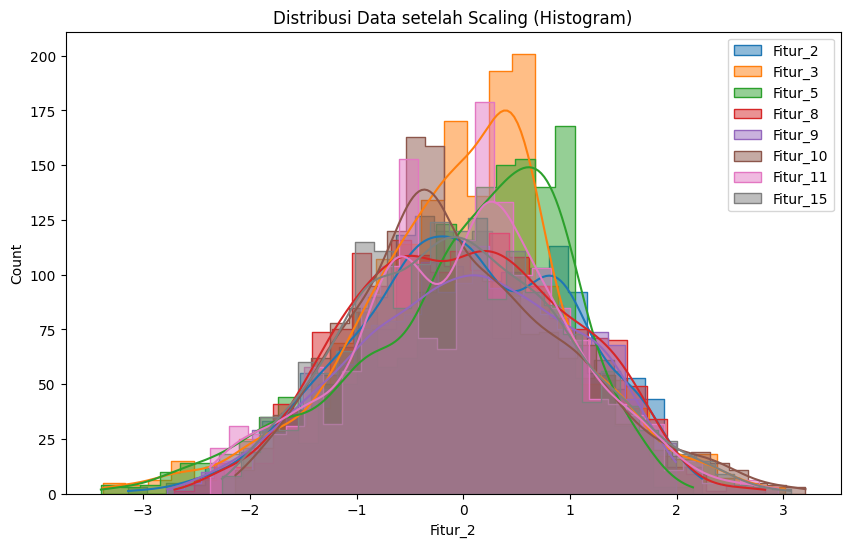

In [ ]:
plt.figure(figsize=(10,6))
for col in x_resampled.columns:
  sns.histplot(x_resampled[col], kde=True, label=col, bins=30, element='step')

plt.title('Distribusi Data setelah Scaling (Histogram)')
plt.legend()
plt.show()

In [ ]:
x_resampled.describe(include='all')

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15
count,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1750.000000,1.750000e+03,1.750000e+03
mean,3.248195e-17,-2.436147e-17,3.248195e-17,-4.060244e-18,3.248195e-17,0.000000,9.744586e-17,-9.744586e-17
std,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00,1.000286,1.000286e+00,1.000286e+00
min,-3.140254e+00,-3.378635e+00,-3.395160e+00,-2.705454e+00,-2.773574e+00,-2.133851,-2.375105e+00,-2.260982e+00
25%,-6.753646e-01,-6.026534e-01,-5.875147e-01,-7.350120e-01,-7.296781e-01,-0.686312,-6.562131e-01,-7.685301e-01
50%,7.019504e-03,6.064925e-02,1.916188e-01,4.347537e-03,4.743591e-02,-0.156897,9.778137e-02,-3.796866e-02
75%,7.859312e-01,5.800266e-01,7.374792e-01,7.330751e-01,7.741500e-01,0.660824,6.644054e-01,6.967193e-01
max,2.237440e+00,3.015720e+00,2.152233e+00,2.828207e+00,1.990205e+00,3.206305,2.949236e+00,3.067800e+00
